<a href="https://colab.research.google.com/github/ArberIvan/CODERHOUSE_ARBER-Ivan/blob/main/Desafio_Evaluaci%C3%B3nML_%2BARBER_Ivan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TRABAJO FINAL: TIPILOGÍA DE BULONES EN OBRAS DE ESTRUCTURAS METÁLICAS**

Alumno: ARBER, Iván


Este trabajo es un analisis de un grupo de obras ya realizadas en distintas partes de argentina y construidas con distintos fines.
Se analizara particularmente una parte de estas estructuras, los bulones. Estos elementos son realmente caros y sobre todo son muy complicados de conseguir, generando grandes conflictos en los tiempos de obra, dilatandolos y creandose numerosos problemas monetarios a las empresas implicadas.
Estos problemas son debidos a la poca y mala oferta de empresas encargadas de hacerlos y "atando" a las empresas constructuras a acomodarse a estos inconvenientes, la manera que encontramos en nuestra empresa es la compra preventiva.
Con la compra preventiva generamos un respaldo para evitar grandes demoras en los montajes de las obras, para eso es muy importante poder prevenir que tipos de bulones se utilizan para cada tipo de obra.
Esto mismo es la finalidad de este estudio, intentar predecir que bulones se utilizaran en las obras dependiendo distintas variables como el tipo de elemento, la zona geografica, tipo de obra, etc.
Para esto primero utilizaremos los datos, limpiandolo un poco y generando algunos graficos para entender a que nos encontramos.

LINK A LA PRESENTACIÓN:
https://docs.google.com/presentation/d/16z2DU_63UvoTMOVeo6kcRhxnJktDA9rNy3QYf794AVM/edit?usp=sharing

**PREGUNTAS-HIPÓTESIS GENERALES**
> Preguntas:
*   Cuales son los tipos de bulones segun diametro mas utilizados?
*   Hay alguna relacion entre los diametros y la clase que se pueda determinar segun los utilizados en las obras?
*   Para los distintos elementos (columnas, vigas, tensores, etc) hay un tipo de bulon mas utilizado? Esto varia segun el tipo de obra?
*   Hay alguna diferencia de cantidad o calidad de bulones entre las obras mineras y las obras de galpones? que porcentaje representa? es representativo?
*   Podriamos predecir con una un probabilidad alta que tipos de bulones y aproximar la cantidad a utilizar en una obra sabiendo los elementos (vigas, columnas, tensores, etc) que se utilizaran y sabiendo el tipo de obra?
*   La prediccion anterior podria determinarse segun que variables ademas de los elementos a conectar y el tipo de obra?, podriamos utilziar variables como la zona sismica, segun el cliente, provincia, etc?
*   Los materiales que son un factor importante en la resistencia del acero (F26, F36, etc) siempre van relacionados a la calidad y diametro del bulon? o depende del tipo de obra y sus solicitaciones (para el calculo de edificios mineros que normalmente estan en zonas sismicas se calculan con solicitaciones mas grandes y por ende sus elementos son mas pesados y robustos).
*   Existe una relacion entre la clase de bulon (calidad del mismo) con el peso de la pieza principal a conectar? hay alguna relacion dependiendo de que elemento se utiliza?
*   Prodiamos predecir sabiendo la obra y los elementos a conectar que tipos de bulones usariamos y la cantidad para poder hacer una compra previa aproximada?
*   Cuales son las conexiones mas tipicas dentro de la obra, cuanto representa en porcentaje cada tipo de conexion en una obra (por ejemplo, la union COLUMNA-VIGA representa un 60% de todas las conexiones y utiliza en el 80% de las veces bulones de 13mm de la clase A307X).

> Hipótesis:
*   1- Hay una relacion directa entre la clase de los bulones utilizados y los diametros con el tipo de obra que se realizara, es decir, para obras de galpones industriales se utilizaran diametros mas chicos y clases de bulones menos resistentes como el A307 y diametros del 10 y 13mm, y lo contrario sera en las obras mineras de zonas sismicas donde se veran mas bulones de 16 mm y superiores.
*   2- Hay una relacion directa entre cantidad de bulones con la cantidad de arandelas y tuercas, son minimos los casos donde se utiliza bulones con distintas cantidades de estos elementos.
*   3- Hay una cierta similitud de cantidad/calidad/diametro de bulones para los tipos conexiones entre elementos y por ende para las obras similares debido a que la empresa constructora (la que provee los datos) siempre va a intentar hacer lo mas simlilar posible las piezas para una fabricacion mas rapida en la industria y su posterior montaje en obra, ademas que los ingenieros siempre van a ser los mismos y van a tender a hacer algo similar siempre para hacer mas rapido el trabajo.
*   4- Vamos a encontrar una relacion casi directa (un porcentaje mayor al 80%) entre los tipos de perfiles utilizados y el tipo de obra, ya que los perfiles de espesores mayores se van a utilizar para obras mineras y no para galpones donde sus solicitaciones son mucho menores, por ende podriamos encontrar que estas obras con estos perfiles utilizan bulones de mayor diametro y largo.
*   Hay algun tipo de perfil tipico que se utilizan para los distintos prefijos? Discriminando segun el tipo de obra

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
from google.colab import drive
import os
import pandas as pd
drive.mount("/content/gdrive")
%cd "/content/gdrive/MyDrive/data_science"
df= pd.read_csv("REPORTE_8_ENTREGA.csv",sep=";", encoding="latin-1")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/data_science


EXPLORACION DE LOS DATOS (EDA) y DATA WRANGLING

In [ ]:
df

,ID,OBRA,UBICACIÓN,NIVEL_SISMICO,TIPO_OBRA,DIAMETRO,CLASE,LARGO,CANTIDAD,CANT_TUERCAS,...,PREFIJO,PERFIL,MATERIAL,LONG,AREA,PESO,CONECTA1,CONECTA2,CONECTA3,CONECTA4
0,1,LIEX,CATAMARCA,2,MINERA,13,A307,32,2,6,...,L,L32*3.2,F26,246.2,0.032,1.1,H53018,NaN,NaN,NaN
1,2,LIEX,CATAMARCA,2,MINERA,13,A307,32,2,6,...,L,L32*3.2,F26,246.2,0.032,1.1,H53018,NaN,NaN,NaN
2,3,LIEX,CATAMARCA,2,MINERA,13,A307,32,2,10,...,L,L32*3.2,F26,312.0,0.040,2.3,H53067,NaN,NaN,NaN
3,4,LIEX,CATAMARCA,2,MINERA,13,A307,32,2,60,...,L,L32*3.2,F26,321.0,0.041,14.5,H53076,NaN,NaN,NaN
4,5,LIEX,CATAMARCA,2,MINERA,13,A307,32,2,2,...,L,L32*3.2,F26,422.8,0.054,0.6,H53054,L53007,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16247,16248,WHIRLP,BUENOS_AIRES,0,PLANTA_INDUSTRIAL,16,A325X,64,4,8,...,V,HI600-7.9-25.4*250,F36,11990.0,26.223,3207.4,A61021,NaN,NaN,NaN
16248,16249,WHIRLP,BUENOS_AIRES,0,PLANTA_INDUSTRIAL,19,A325X-FPB,57,5,20,...,V,HI600-7.9-25.4*250,F36,11990.0,26.223,3207.4,A61047,A61047,NaN,NaN
16249,16250,WHIRLP,BUENOS_AIRES,0,PLANTA_INDUSTRIAL,19,A325X-FPB,89,8,64,...,V,HI600-7.9-25.4*250,F36,11990.0,26.223,3207.4,A61049,A61048,NaN,NaN
16250,16251,WHIRLP,BUENOS_AIRES,0,PLANTA_INDUSTRIAL,19,A325X-FPB,83,1,4,...,V,PHI750-7.9-31.8*380-25.4*200,F36,11490.0,30.427,8167.2,A61015,NaN,NaN,NaN


**OBJETIVO**

El objetivo elegido de mi trabajo es el analisis de los bulones entre sus 4 caracteristicas principales (clase, diametro, largo y cantidad) que me van a ayudar para realizar una compra previa a la finalizacion del detallamiento real de una pieza. voy a analizar primero con graficas univariadas y bivariadas para encontrar las relaciones que existen y algun insight, para esto yo voy a elegir previamente que variables a analizar.

Primero antes de comenzar mi analisis, voy a eliminar los elementos de prefijo "B" ya que estos son las barandas y no generan valor a mi analisis ya que por mas que cuando eleva el nivel sismico las barandas tienden a tener mayores secciones en sus piezas en los bulones no es asi.

In [ ]:
#Dataframe sin barandas (sin prefijo "B")
df = df[df['PREFIJO'] != 'B']
df

,ID,OBRA,UBICACIÓN,NIVEL_SISMICO,TIPO_OBRA,DIAMETRO,CLASE,LARGO,CANTIDAD,CANT_TUERCAS,...,PREFIJO,PERFIL,MATERIAL,LONG,AREA,PESO,CONECTA1,CONECTA2,CONECTA3,CONECTA4
0,1,LIEX,CATAMARCA,2,MINERA,13,A307,32,2,6,...,L,L32*3.2,F26,246.2,0.032,1.1,H53018,NaN,NaN,NaN
1,2,LIEX,CATAMARCA,2,MINERA,13,A307,32,2,6,...,L,L32*3.2,F26,246.2,0.032,1.1,H53018,NaN,NaN,NaN
2,3,LIEX,CATAMARCA,2,MINERA,13,A307,32,2,10,...,L,L32*3.2,F26,312.0,0.040,2.3,H53067,NaN,NaN,NaN
3,4,LIEX,CATAMARCA,2,MINERA,13,A307,32,2,60,...,L,L32*3.2,F26,321.0,0.041,14.5,H53076,NaN,NaN,NaN
4,5,LIEX,CATAMARCA,2,MINERA,13,A307,32,2,2,...,L,L32*3.2,F26,422.8,0.054,0.6,H53054,L53007,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16247,16248,WHIRLP,BUENOS_AIRES,0,PLANTA_INDUSTRIAL,16,A325X,64,4,8,...,V,HI600-7.9-25.4*250,F36,11990.0,26.223,3207.4,A61021,NaN,NaN,NaN
16248,16249,WHIRLP,BUENOS_AIRES,0,PLANTA_INDUSTRIAL,19,A325X-FPB,57,5,20,...,V,HI600-7.9-25.4*250,F36,11990.0,26.223,3207.4,A61047,A61047,NaN,NaN
16249,16250,WHIRLP,BUENOS_AIRES,0,PLANTA_INDUSTRIAL,19,A325X-FPB,89,8,64,...,V,HI600-7.9-25.4*250,F36,11990.0,26.223,3207.4,A61049,A61048,NaN,NaN
16250,16251,WHIRLP,BUENOS_AIRES,0,PLANTA_INDUSTRIAL,19,A325X-FPB,83,1,4,...,V,PHI750-7.9-31.8*380-25.4*200,F36,11490.0,30.427,8167.2,A61015,NaN,NaN,NaN


In [ ]:
#Reviso la informacion de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15187 entries, 0 to 16251
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             15187 non-null  int64  
 1   OBRA           15187 non-null  object 
 2   UBICACIÓN      15187 non-null  object 
 3   NIVEL_SISMICO  15187 non-null  int64  
 4   TIPO_OBRA      15187 non-null  object 
 5   DIAMETRO       15187 non-null  int64  
 6   CLASE          15187 non-null  object 
 7   LARGO          15187 non-null  int64  
 8   CANTIDAD       15187 non-null  int64  
 9   CANT_TUERCAS   15187 non-null  int64  
 10  CANT_ARAND     15187 non-null  int64  
 11  PREFIJO        15187 non-null  object 
 12  PERFIL         15187 non-null  object 
 13  MATERIAL       15187 non-null  object 
 14  LONG           15187 non-null  float64
 15  AREA           15187 non-null  float64
 16  PESO           15187 non-null  float64
 17  CONECTA1       15136 non-null  object 
 18  CONECT

In [ ]:
df.dtypes

ID                 int64
OBRA              object
UBICACIÓN         object
NIVEL_SISMICO      int64
TIPO_OBRA         object
DIAMETRO           int64
CLASE             object
LARGO              int64
CANTIDAD           int64
CANT_TUERCAS       int64
CANT_ARAND         int64
PREFIJO           object
PERFIL            object
MATERIAL          object
LONG             float64
AREA             float64
PESO             float64
CONECTA1          object
CONECTA2          object
CONECTA3          object
CONECTA4          object
dtype: object

In [ ]:
df.describe()

,ID,NIVEL_SISMICO,DIAMETRO,LARGO,CANTIDAD,CANT_TUERCAS,CANT_ARAND,LONG,AREA,PESO
count,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000
mean,8415.928360,1.731613,18.902219,55.181669,3.424310,9.745243,9.819846,4023.371930,4.754169,2479.814967
std,4663.234048,1.143988,4.034585,16.014114,2.576982,27.990565,28.113174,2987.667689,7.124078,10746.397578
min,1.000000,0.000000,10.000000,32.000000,1.000000,1.000000,0.000000,212.000000,0.032000,0.600000
25%,4569.500000,1.000000,16.000000,44.000000,2.000000,2.000000,2.000000,1524.200000,0.717000,53.450000
50%,8575.000000,2.000000,19.000000,57.000000,2.000000,4.000000,4.000000,3161.200000,2.042000,200.800000
75%,12437.500000,3.000000,19.000000,64.000000,4.000000,8.000000,8.000000,5664.600000,5.584000,953.500000
max,16252.000000,3.000000,32.000000,178.000000,30.000000,1136.000000,1136.000000,13524.600000,47.730000,184981.500000


Con esto vemos:
*   Hay mucha variedad en las variables de longitud, area y peso.
*   Hay 4 tipos de niveles sismicos (0, 1, 2, 3).
*   La media de las tuercas y arandelas son practicamente iguales.



El diametro de los bulones quiero que sea una variable categorica y no numerica

In [ ]:
df_1['DIAMETRO'] = df['DIAMETRO'].astype('object')
df_1['NIVEL_SISMICO'] = df['NIVEL_SISMICO'].astype('object')

Chequeo de duplicados

In [ ]:
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(f"Número de filas duplicadas: {num_duplicates}")


Número de filas duplicadas: 8395


Hay gran cantidad de elementos iguales, esto es debido a que siempre se intenta igualar las piezas para evitar gran cantidad de piezas distintas.

La presencia de valores ausentes puede ser verificada de diversas maneras. Una opción es a través de un gráfico, como el que se muestra a continuación.

<Axes: >

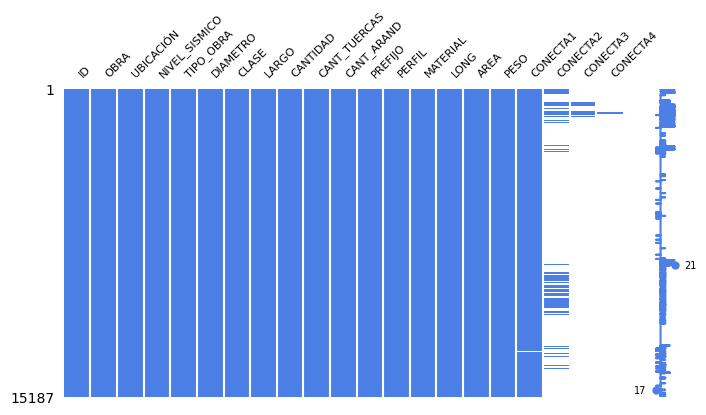

In [ ]:
import missingno as msno
msno.matrix(df, figsize=(8,4), color=(0.3, 0.5, 0.9), fontsize=8)

In [ ]:
df.isnull().sum()

ID                   0
OBRA                 0
UBICACIÓN            0
NIVEL_SISMICO        0
TIPO_OBRA            0
DIAMETRO             0
CLASE                0
LARGO                0
CANTIDAD             0
CANT_TUERCAS         0
CANT_ARAND           0
PREFIJO              0
PERFIL               0
MATERIAL             0
LONG                 0
AREA                 0
PESO                 0
CONECTA1            51
CONECTA2         12071
CONECTA3         14756
CONECTA4         14985
dtype: int64

Con esto vemos que la mayoria de los elementos se conectan solamente con otro elemento y son muy pocos los que tienen mas de 1 conexion, por eso crece de gran manera los nulos en los conecta. Por ende prefiero no eliminar estos nulos ya que me aportan informacion.

ANALISIS UNIVARIADO

Lo primero que analizaremos son las variables mas importantes de los bulones, si encontramos algunas que sean mas recurrentes que otras y por ende mas importantes.

ANALISIS DE CLASE DE LOS BULONES
Veamos si hay algun tipo de clase que mas se repite

In [ ]:
df_clase=df_1[['CANTIDAD','CLASE']]
pie_clase = df_clase.groupby('CLASE').agg('count')
pie_clase=pie_clase.rename(columns={'CANTIDAD': 'Frecuencia'})
pie_clase

,Frecuencia
CLASE,
A307,3195
A307-CUNA,24
A325-CUNA,1
A325N,9
A325N-FPB,1
A325X,8965
A325X-CUNA,46
A325X-FPB,2848
A325X-V,9


In [ ]:
import plotly.express as px
fig = px.pie(pie_clase, values='Frecuencia', \
             names=pie_clase.index, title='Cantidad de bulones por clase')
fig.show()

<ipython-input-10-f7b8fe65c88b>:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=df_1, x="CLASE",hue="TIPO_OBRA", ax=ax1, palette=["red", "blue", "green"], multiple='stack')


Text(0, 0.5, 'Cantidad utilizada')

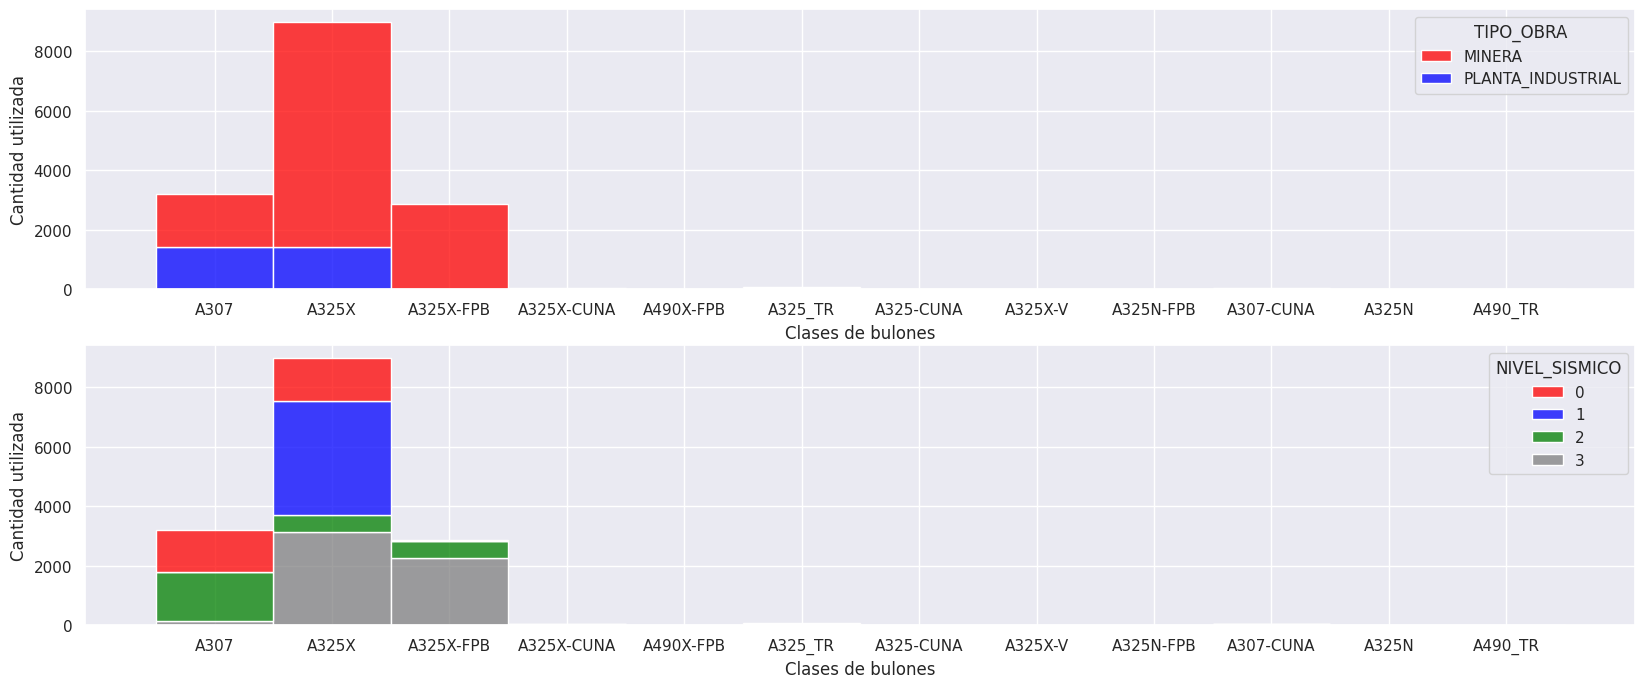

In [ ]:
sns.set(style="darkgrid")
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(20, 8))
sns.histplot(data=df_1, x="CLASE",hue="TIPO_OBRA", ax=ax1, palette=["red", "blue", "green"], multiple='stack')
ax1.set_xlabel("Clases de bulones")
ax1.set_ylabel("Cantidad utilizada")
sns.histplot(data=df_1, x="CLASE",hue="NIVEL_SISMICO", ax=ax2, palette=["red", "blue", "green", "grey"], multiple='stack')
ax2.set_xlabel("Clases de bulones")
ax2.set_ylabel("Cantidad utilizada")

De estos dos graficos vemos una gran insight que es que los bulones mas importantes en este analisis son los A307, A325X y los A325X-FPB. Son la gran mayoria y por ende los que mas van "a mover la aguja" tanto en el gasto de la empresa.

ANALISIS DE DIAMETRO DE LOS BULONES

In [ ]:
df_diametro=df_1[['CANTIDAD','DIAMETRO']]
pie_diametro = df_diametro.groupby('DIAMETRO').agg('count')
pie_diametro=pie_diametro.rename(columns={'CANTIDAD': 'Frecuencia'})
fig = px.pie(pie_diametro, values='Frecuencia', \
             names=pie_diametro.index, title='Cantidad de bulones por diametro')
fig.show()

ANALISIS DE LARGO DE BULONES

<ipython-input-33-f7bc4a1dc2a7>:3: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.histplot(data=df_1, x="LARGO",hue="TIPO_OBRA", palette=["red", "blue", "green","orange","grey"], multiple='stack')


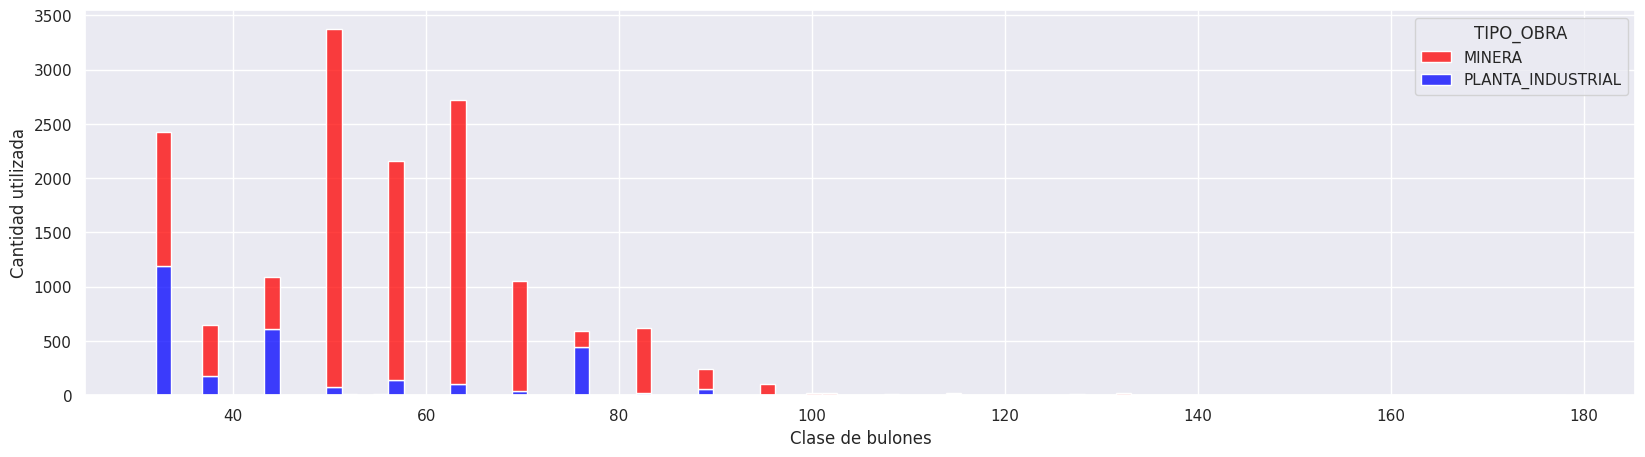

In [ ]:
sns.set(style="darkgrid")
fig, (ax1) = plt.subplots(1, 1,figsize=(20, 5))
sns.histplot(data=df_1, x="LARGO",hue="TIPO_OBRA", palette=["red", "blue", "green","orange","grey"], multiple='stack')
ax1.set_xlabel("Clase de bulones")
ax1.set_ylabel("Cantidad utilizada")
plt.show()

ANALISIS DE PREFIJO DE ELEMENTOS UTILIZADOS:
Este es muy importante ya que vamos a ver que elementos son mas comunes

<ipython-input-18-e95262b1d3b5>:3: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



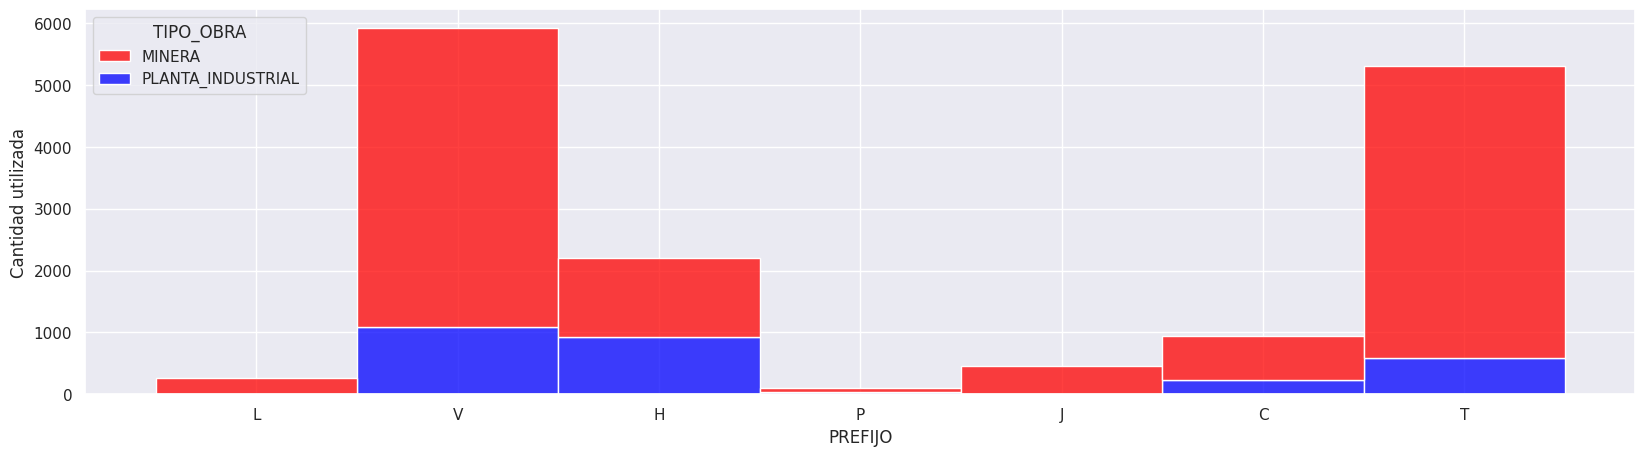

In [ ]:
sns.set(style="darkgrid")
fig, (ax1) = plt.subplots(1, 1,figsize=(20, 5))
sns.histplot(data=df_1, x="PREFIJO",hue="TIPO_OBRA", palette=["red", "blue", "green","orange","grey"], multiple='stack')
ax1.set_xlabel("PREFIJO")
ax1.set_ylabel("Cantidad utilizada")
plt.show()

Con el grafico anterior casi que podemos descartar los elementos P y L (parantes y longitudinales) ya que son muy pocos.

ANALISIS CANTIDAD DE BULONES

<ipython-input-63-425a05a28ea0>:3: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



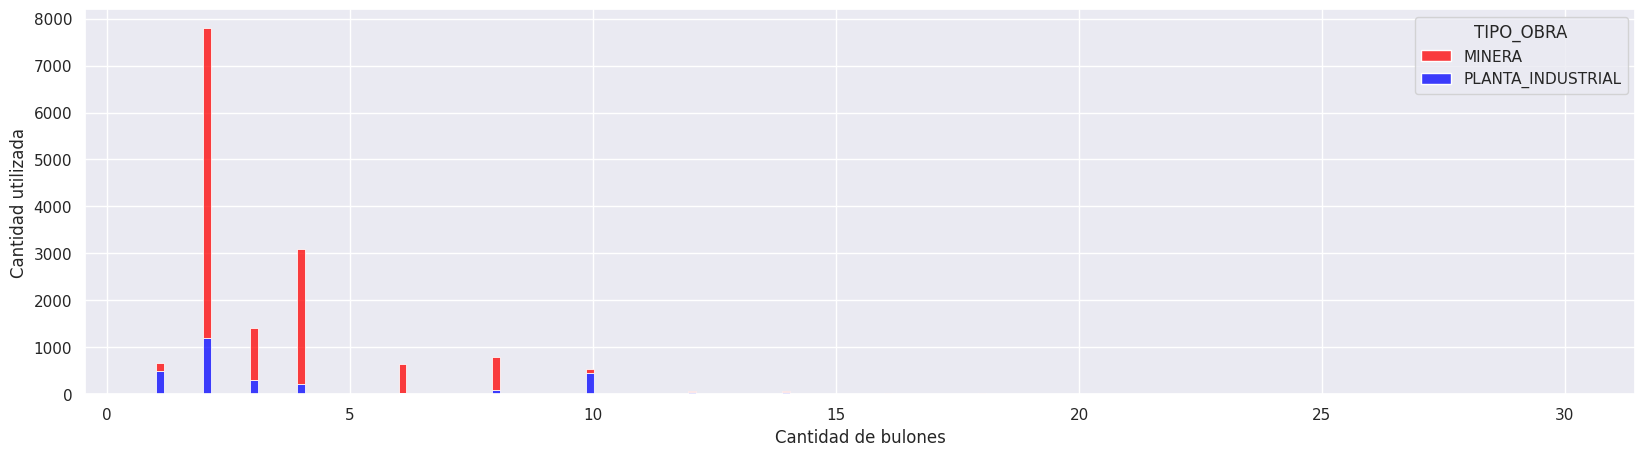

In [ ]:
sns.set(style="darkgrid")
fig, (ax1) = plt.subplots(1, 1,figsize=(20, 5))
sns.histplot(data=df_1, x="CANTIDAD",hue="TIPO_OBRA", palette=["red", "blue", "green","orange","grey"], multiple='stack')
ax1.set_xlabel("Cantidad de bulones")
ax1.set_ylabel("Cantidad utilizada")
plt.show()

**GRAFICO 3**

Ahora quiero analizar si hay algun tipo de relación entre los tipos de elementos que utlizamos en una obra con los diametros de bulones

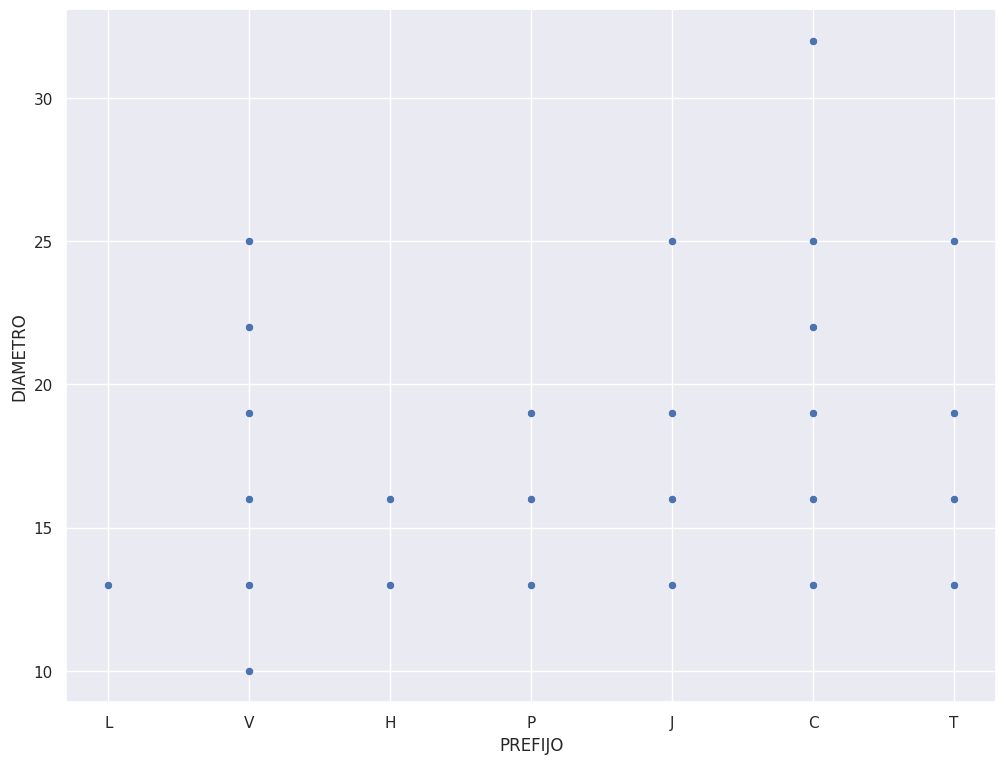

In [ ]:
sns.set(style="darkgrid")
sns.scatterplot(data=df_1, x="PREFIJO", y="DIAMETRO")
plt.show()

*ANALISIS/RECOMENDACION*

Con el grafico anterior vemos cuales son los diametros mas utilizados para cada tipo de elemento, en este caso se ve que para las vigas (V) y columnas  (C) se utiliza basicamente todos los tipos de diametros de bulones y que para las obras analizadas solo se utilizo bulones menores de 13mm para vigas, pero no para ningun otro elemento constructivo, es decir que se puede dar por hecho que cuando quieras comprar preventivamente bulones para algun elemento que no sea viga debera ser si o si de diametro mayor.

**GRAFICO 4**

Hacemos unos analisis de las clases y los elementos

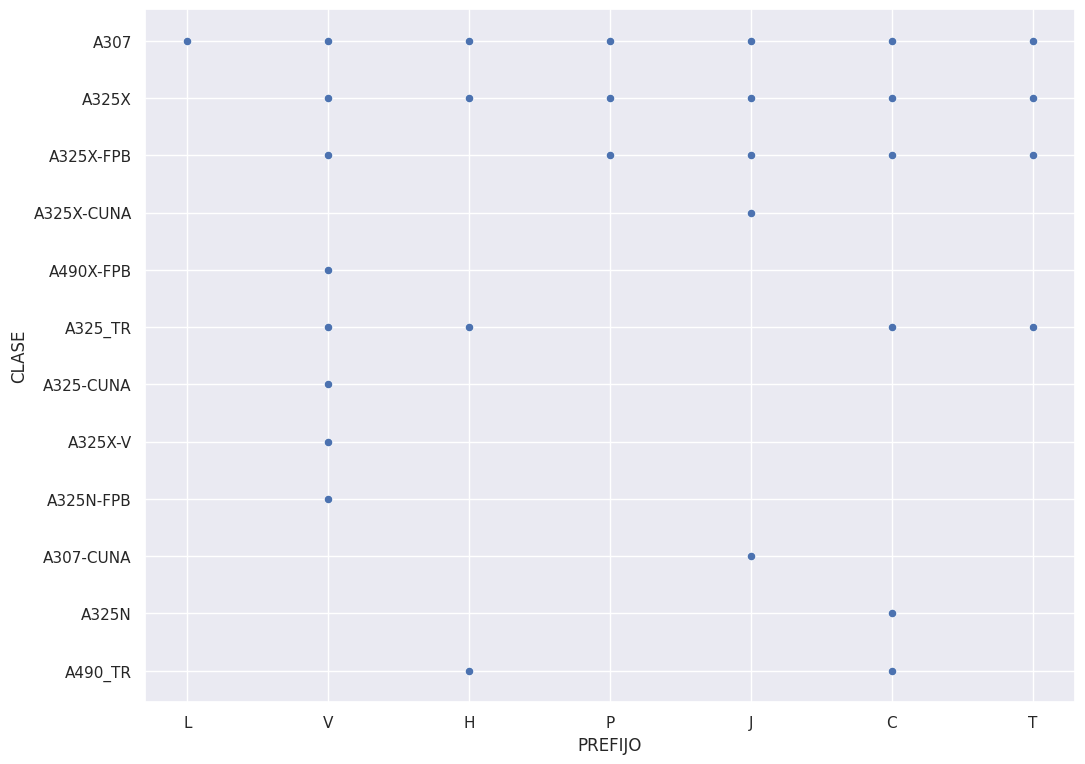

In [ ]:
sns.set(style="darkgrid")
sns.set(style="darkgrid")
sns.scatterplot(data=df_1, x="PREFIJO", y="CLASE")
plt.show()

*ANALISIS/RECOMENDACION*

Este grafico nos aporta tambien mucha informacion, ya que observamos que las "J" que son las jambas de las escaleras y las vigas son los unicos elementos que utilizan los bulones tipo cuña que son especiales para agarrarse a los perfiles UPN y por ende solo en estos elementos (J y V) se utilizan los UPN.

In [ ]:
df_1.describe()

,ID,LARGO,CANTIDAD,CANT_TUERCAS,CANT_ARAND,LONG,AREA,PESO
count,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000
mean,8415.928360,55.181669,3.424310,9.745243,9.819846,4023.371930,4.754169,2479.814967
std,4663.234048,16.014114,2.576982,27.990565,28.113174,2987.667689,7.124078,10746.397578
min,1.000000,32.000000,1.000000,1.000000,0.000000,212.000000,0.032000,0.600000
25%,4569.500000,44.000000,2.000000,2.000000,2.000000,1524.200000,0.717000,53.450000
50%,8575.000000,57.000000,2.000000,4.000000,4.000000,3161.200000,2.042000,200.800000
75%,12437.500000,64.000000,4.000000,8.000000,8.000000,5664.600000,5.584000,953.500000
max,16252.000000,178.000000,30.000000,1136.000000,1136.000000,13524.600000,47.730000,184981.500000


In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [ ]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

ImportError: ignored

In [ ]:
pandas_profiling.ProfileReport(df_1)

NameError: ignored

<ipython-input-83-36b29f8b5e75>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



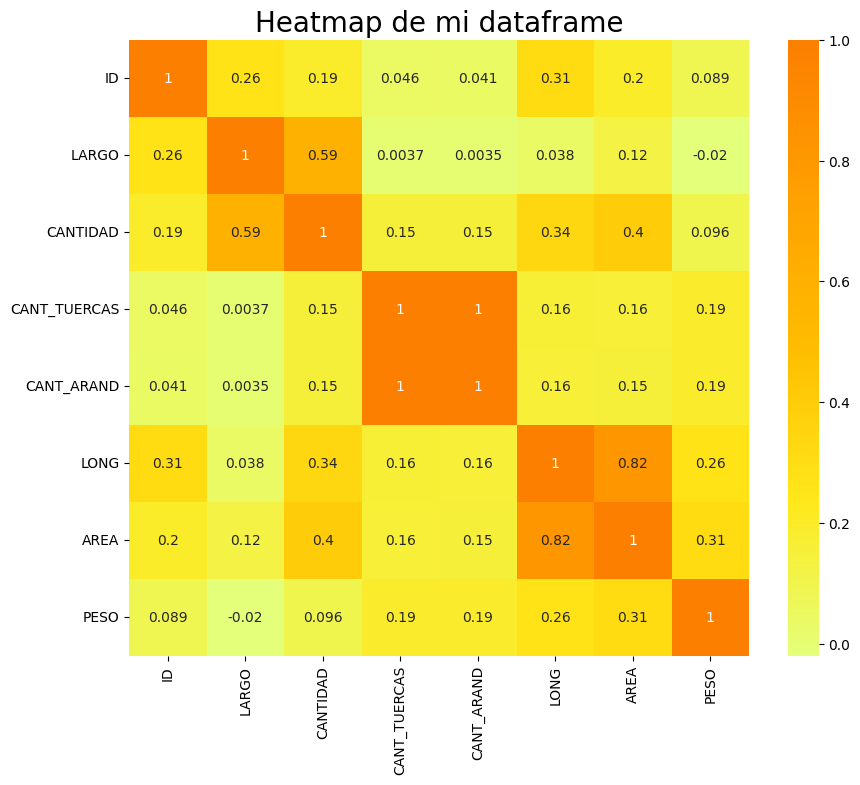

In [ ]:
plt.rcParams['figure.figsize'] = (10, 8)

sns.heatmap(df_1.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap de mi dataframe', fontsize = 20)
plt.show()

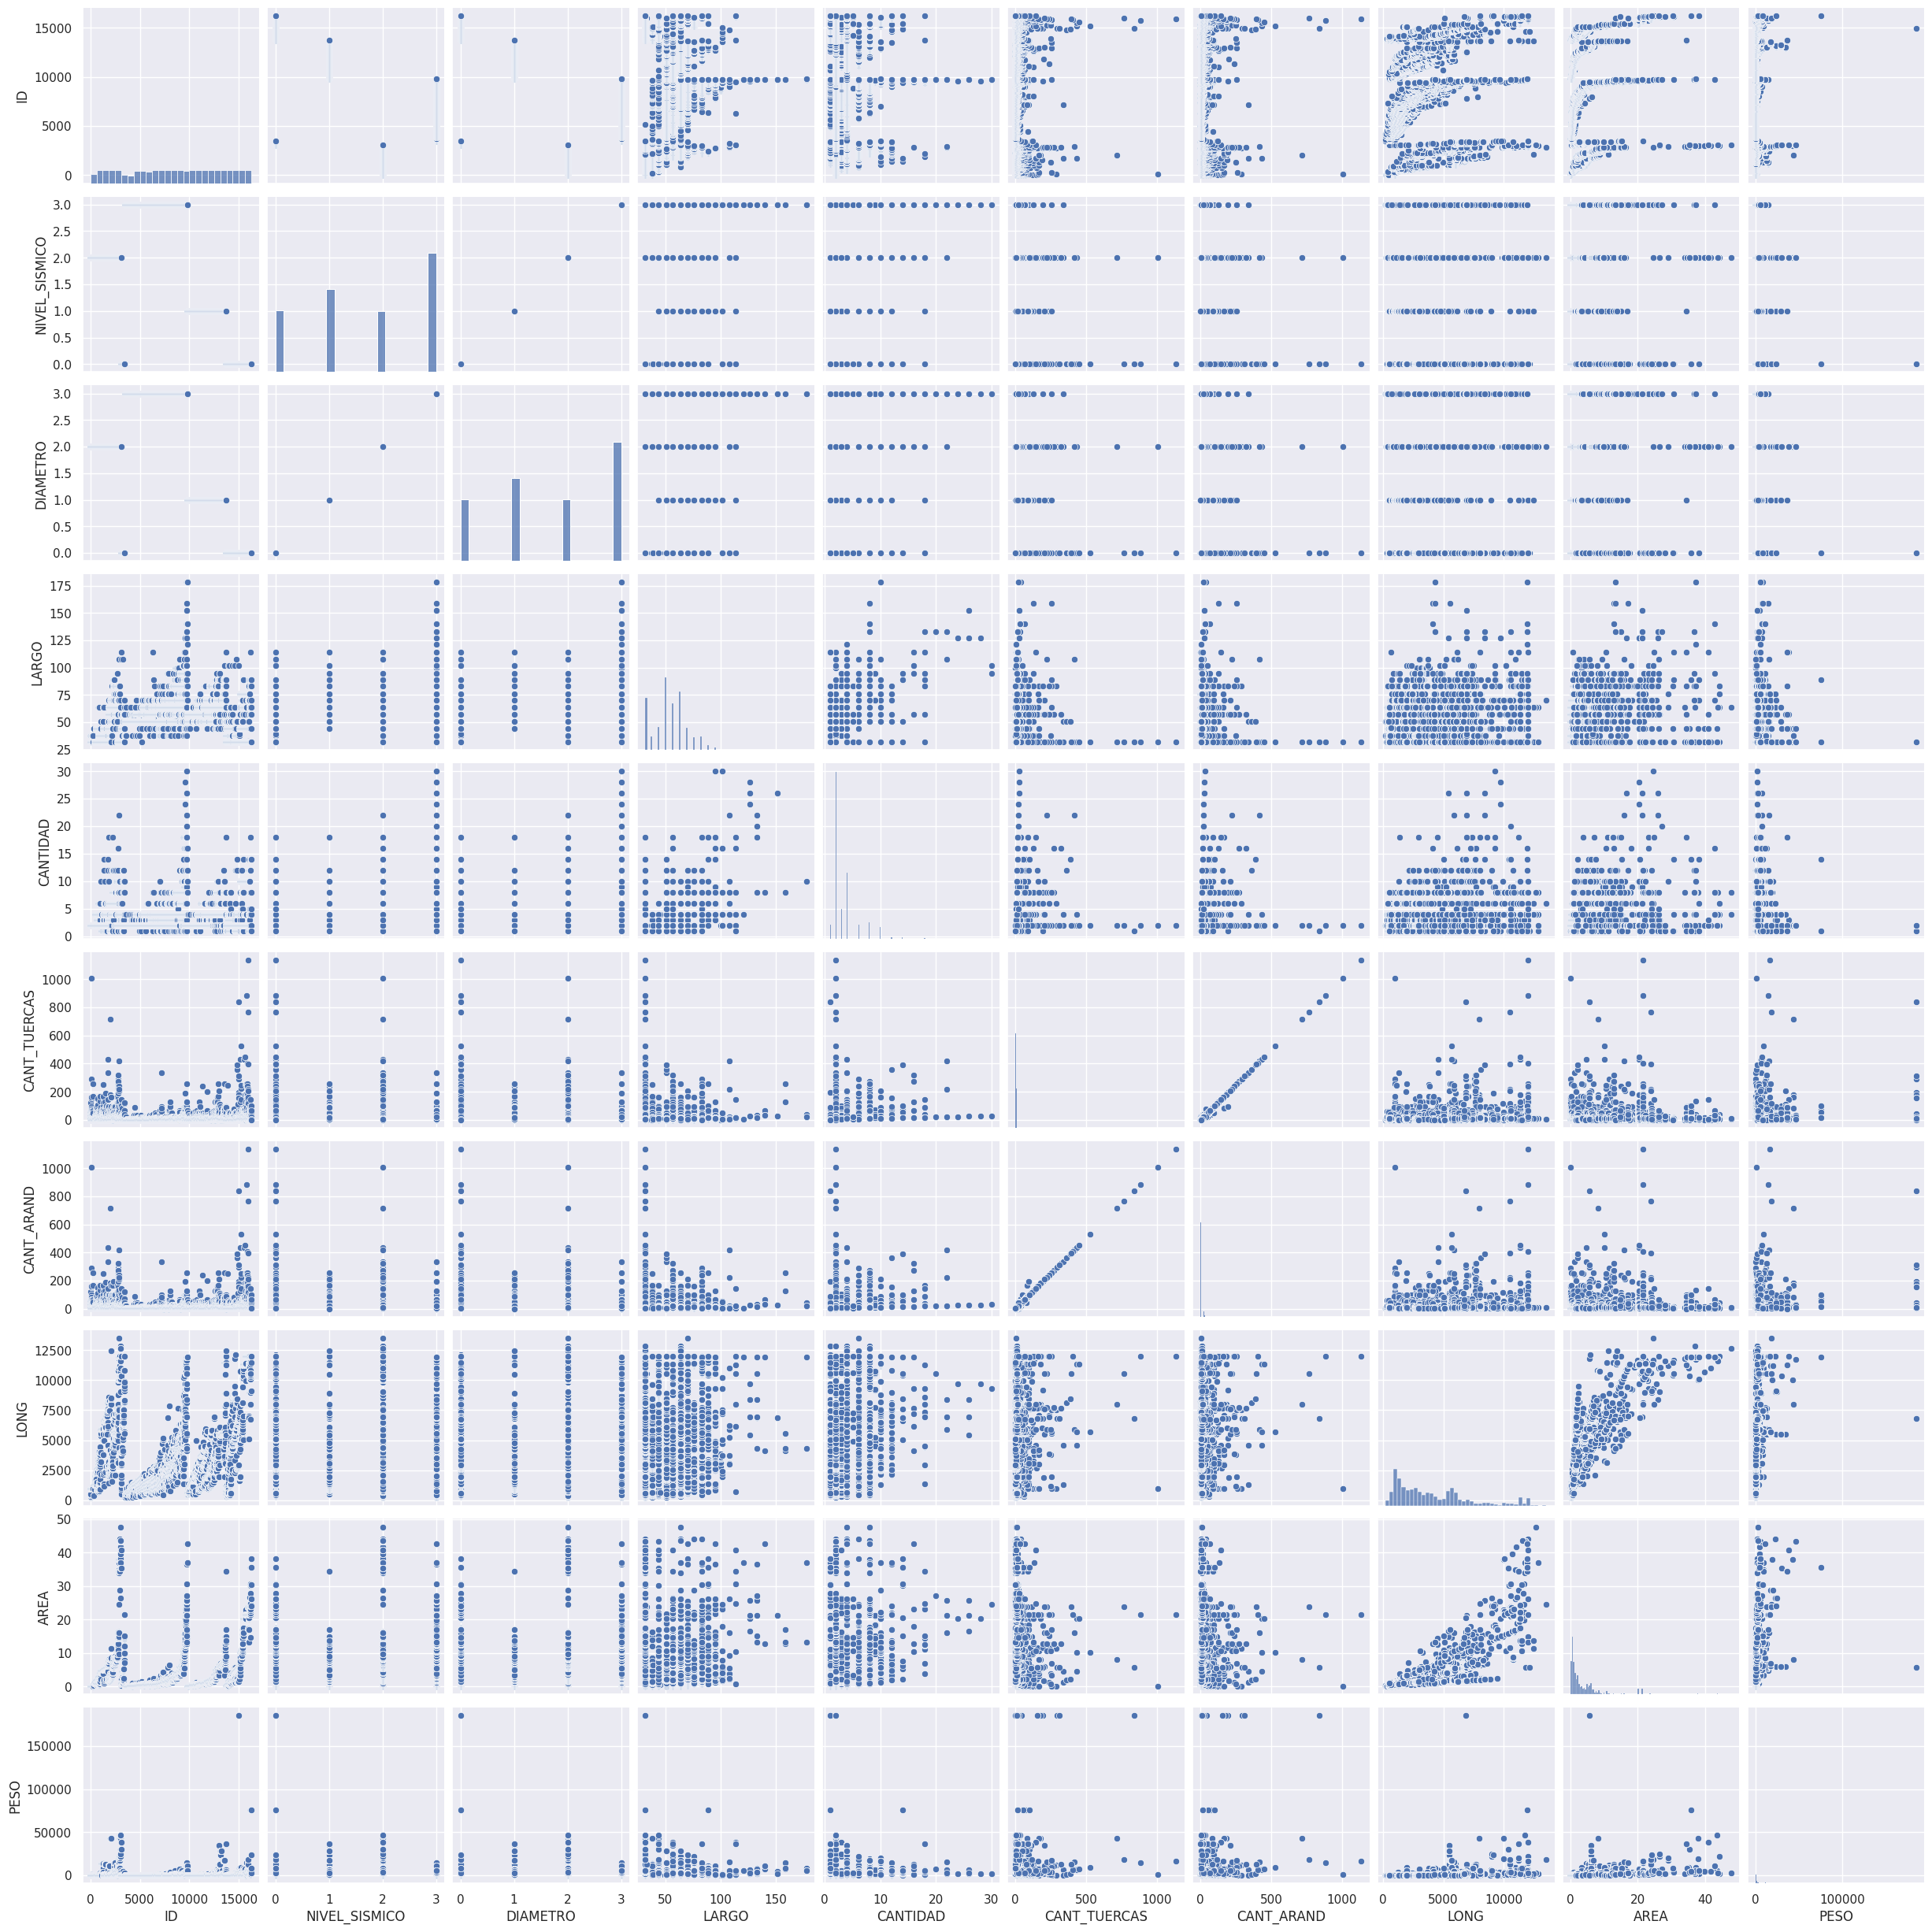

In [ ]:
sns.pairplot(data=df_1)

Text(0.5, 1.0, 'CANTIDAD/LARGO')

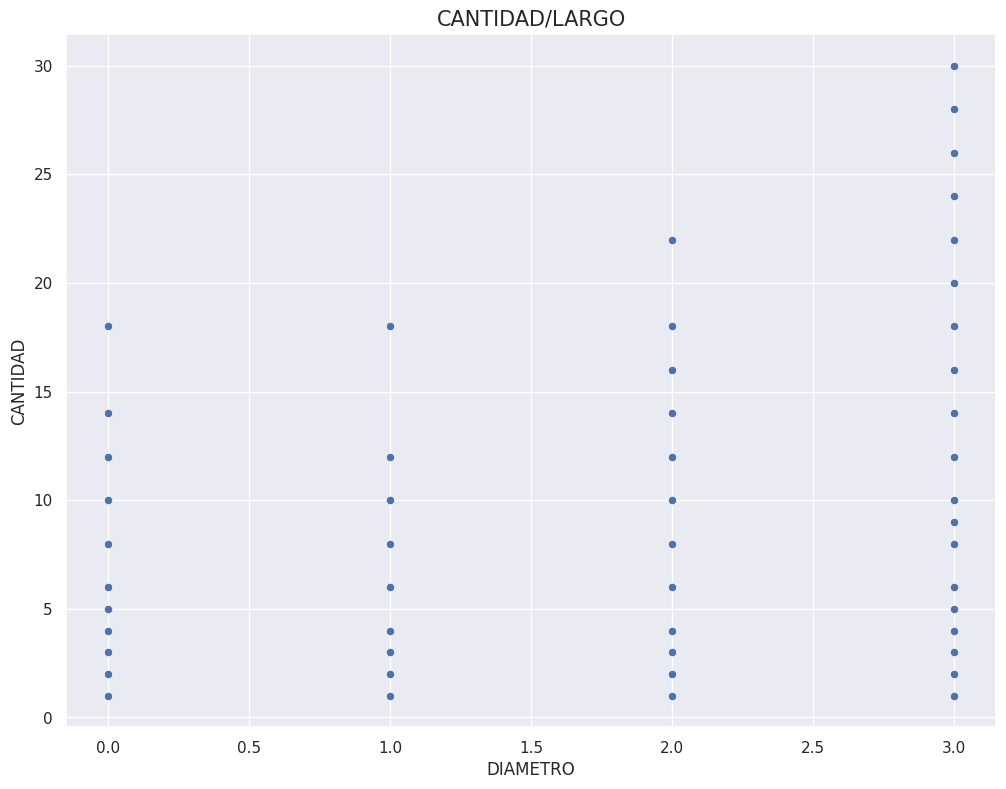

In [ ]:
sns.scatterplot(x="DIAMETRO", y="CANTIDAD", data=df_1)
plt.title('CANTIDAD/LARGO', fontsize = 15, fontweight = 15)

Text(0.5, 1.0, 'CANTIDAD DE TUERCAS/CANTIDAD DE ARANDELAS')

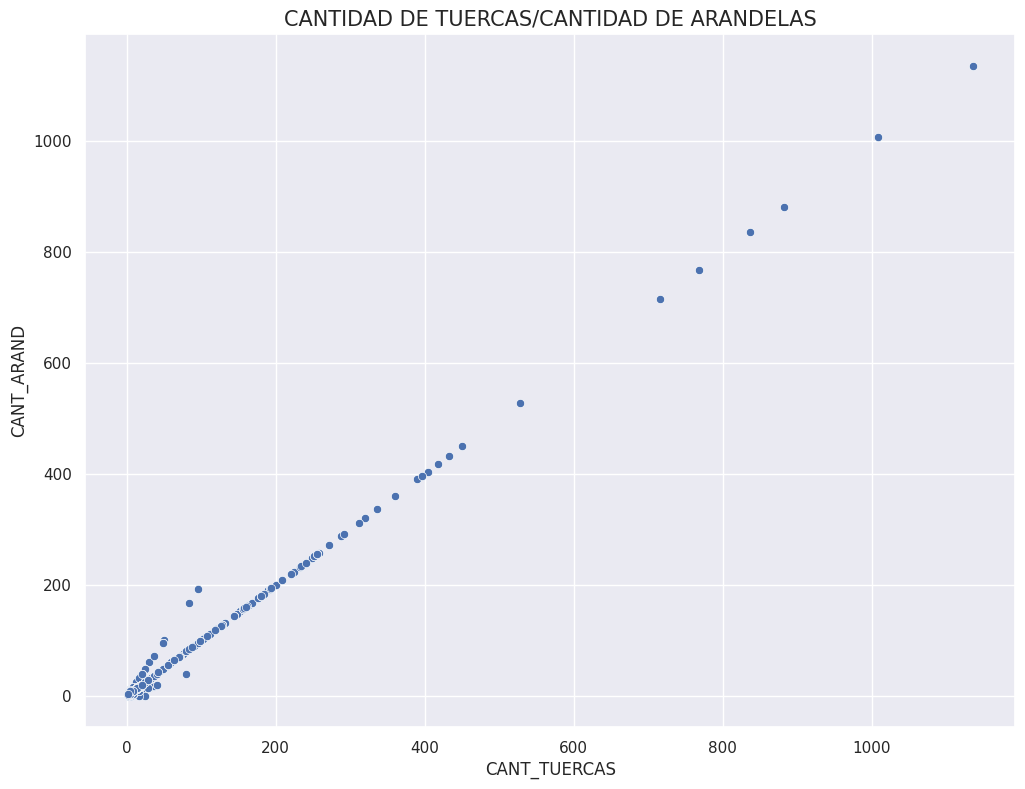

In [ ]:
sns.scatterplot(x="CANT_TUERCAS", y="CANT_ARAND", data=df_1)
plt.title('CANTIDAD DE TUERCAS/CANTIDAD DE ARANDELAS', fontsize = 15, fontweight = 15)

Vemos una gran correlacion entre las variables

Text(0.5, 1.0, 'CANTIDAD/AREA')

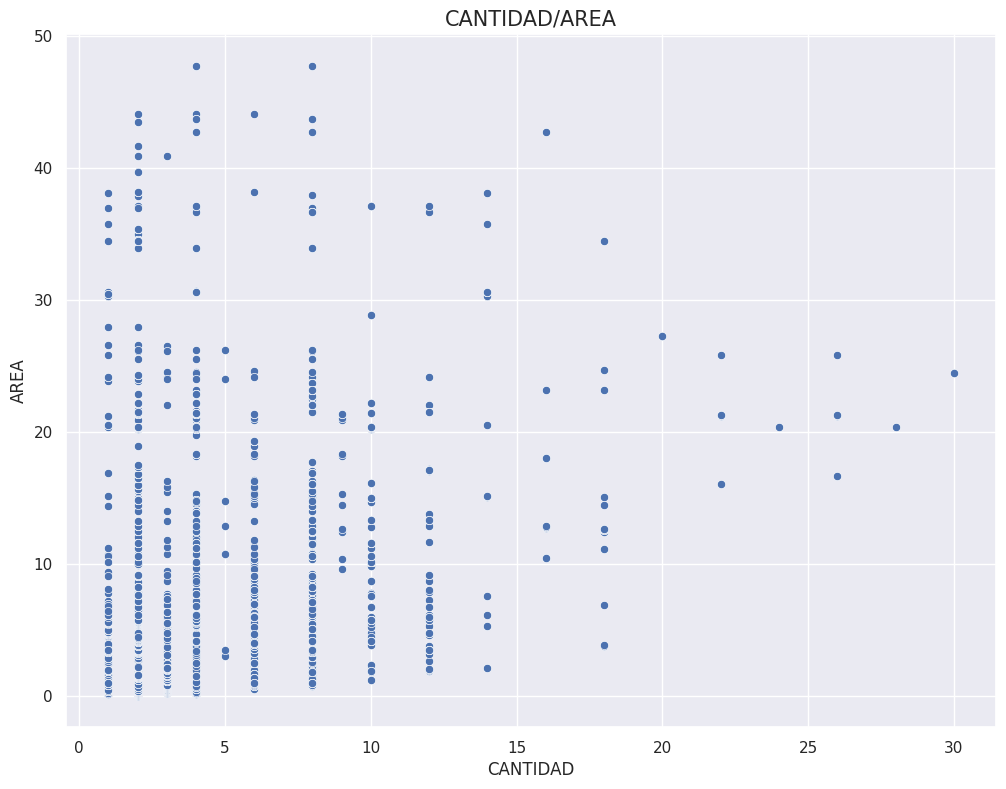

In [ ]:
sns.scatterplot(x="CANTIDAD", y="AREA", data=df_1)
plt.title('CANTIDAD/AREA', fontsize = 15, fontweight = 15)

In [ ]:
# Calculamos el coeficiente de correlacion entre Ranking y partidos ganados
correlation = df['CANTIDAD'].corr(df['AREA'])

# Imprimimos el coeficiente de correlacion
print("Coeficiente de correlación:", correlation)

Coeficiente de correlación: 0.40450306559785065


El coeficiente nos indica que hay una baja correlacion entre las variables, como ya lo podiamos ver en el grafico

Nuevamente DATA WRANGLING

In [ ]:
columnas_eliminadas = ['ID','UBICACIÓN','PERFIL','OBRA','MATERIAL','LONG','AREA','CANT_TUERCAS', 'CONECTA1', 'CONECTA2','CONECTA3','CONECTA4','CANT_ARAND']  # Lista con los nombres de las columnas a eliminar
df_1= df_1.drop(columns=columnas_eliminadas)

In [ ]:
#Como tambien observe que son pocos los tipos de CLASES que se utilizan, voy a utilizar las principales que son las mas representativas
#esas son A307, A325X, A325X-FPB, A325X-CUNA y A325-TR
df_1 = df_1[df_1['CLASE'].isin(['A307', 'A325X', 'A325X-FPB', 'A325X-CUNA', 'A325_TR'])]

Elimino las filas que tengan valores nulos ya que si es asi es un error del reporte, me sirve como verificacion

In [ ]:
df_1 = df_1.dropna()

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15127 entries, 0 to 16251
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NIVEL_SISMICO  15127 non-null  object 
 1   TIPO_OBRA      15127 non-null  object 
 2   DIAMETRO       15127 non-null  object 
 3   CLASE          15127 non-null  object 
 4   LARGO          15127 non-null  int64  
 5   CANTIDAD       15127 non-null  int64  
 6   PREFIJO        15127 non-null  object 
 7   PESO           15127 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 1.0+ MB


REGRESION LINEAL

Voy a intentar predecir el diametro de los bulones segun el resto de columnas de mi df_1

Primero separo la variable objetivo (CLASE) de las caracteristicas

In [ ]:
X = df_1.drop(columns=['DIAMETRO'])
y = df_1['DIAMETRO']

In [ ]:
print("Características (X):")
print(X.columns)

print("\nVariable objetivo (y):")
print(y.head())

Características (X):
Index(['NIVEL_SISMICO', 'TIPO_OBRA', 'CLASE', 'LARGO', 'CANTIDAD', 'PREFIJO',
       'PESO'],
      dtype='object')

Variable objetivo (y):
0    13
1    13
2    13
3    13
4    13
Name: DIAMETRO, dtype: object


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (10588, 7)
Forma de X_test: (4539, 7)
Forma de y_train: (10588,)
Forma de y_test: (4539,)


In [ ]:
columnas_categoricas = ['TIPO_OBRA', 'CLASE', 'PREFIJO']
print(X[columnas_categoricas].isnull().sum())

TIPO_OBRA    0
CLASE        0
PREFIJO      0
dtype: int64


In [ ]:
X_encoded = pd.get_dummies(X, columns=columnas_categoricas, drop_first=True)

In [ ]:
print(X_encoded.dtypes)

NIVEL_SISMICO                   object
LARGO                            int64
CANTIDAD                         int64
PESO                           float64
TIPO_OBRA_PLANTA_INDUSTRIAL      uint8
CLASE_A325X                      uint8
CLASE_A325X-CUNA                 uint8
CLASE_A325X-FPB                  uint8
CLASE_A325_TR                    uint8
PREFIJO_H                        uint8
PREFIJO_J                        uint8
PREFIJO_L                        uint8
PREFIJO_P                        uint8
PREFIJO_T                        uint8
PREFIJO_V                        uint8
dtype: object


In [ ]:
print(df_1['TIPO_OBRA'].unique())
print(df_1['CLASE'].unique())
print(df_1['PREFIJO'].unique())

['MINERA' 'PLANTA_INDUSTRIAL']
['A307' 'A325X' 'A325X-FPB' 'A325X-CUNA' 'A325_TR']
['L' 'V' 'H' 'P' 'J' 'C' 'T']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)

Calculo de r2 medio

In [ ]:
print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE): 3.749088015447423


Random Forest

In [ ]:
X = df[['NIVEL_SISMICO', 'TIPO_OBRA', 'LARGO', 'CANTIDAD', 'PESO', 'PREFIJO']]
y = df['DIAMETRO']

Convertir las columnas categóricas en variables dummy para que puedan ser utilizadas en el modelo

In [ ]:
X = pd.get_dummies(X, drop_first=True)
X

<ipython-input-105-38983c06a356>:1: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



,LARGO,CANTIDAD,PESO,NIVEL_SISMICO_1,NIVEL_SISMICO_2,NIVEL_SISMICO_3,TIPO_OBRA_PLANTA_INDUSTRIAL,PREFIJO_H,PREFIJO_J,PREFIJO_L,PREFIJO_P,PREFIJO_T,PREFIJO_V
0,32,2,1.1,0,1,0,0,0,0,1,0,0,0
1,32,2,1.1,0,1,0,0,0,0,1,0,0,0
2,32,2,2.3,0,1,0,0,0,0,1,0,0,0
3,32,2,14.5,0,1,0,0,0,0,1,0,0,0
4,32,2,0.6,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16247,64,4,3207.4,0,0,0,1,0,0,0,0,0,1
16248,57,5,3207.4,0,0,0,1,0,0,0,0,0,1
16249,89,8,3207.4,0,0,0,1,0,0,0,0,0,1
16250,83,1,8167.2,0,0,0,1,0,0,0,0,0,1


Dividir los datos en conjuntos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Crear y entrenar el modelo de Random Forest

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print(rf_model)

RandomForestRegressor(random_state=42)


Realizar predicciones en el conjunto de prueba

In [ ]:
y_pred = rf_model.predict(X_test)
print(y_pred)

[19. 13. 19. ... 19. 25. 25.]


Calcular el error cuadrático medio (MSE)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE): 0.1798049137083676


Mape

Definir las características (features) y etiquetas (labels)

In [ ]:
X = df_1[['NIVEL_SISMICO', 'TIPO_OBRA', 'LARGO', 'CANTIDAD', 'PESO', 'PREFIJO']]
y = df_1['DIAMETRO']

Convertir las columnas categóricas en variables dummy para que puedan ser utilizadas en el modelo

In [ ]:
X = pd.get_dummies(X, drop_first=True)

Dividir los datos en conjuntos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Crear y entrenar el modelo de Random Forest

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print(rf_model)

RandomForestRegressor(random_state=42)


Realizar validación cruzada para evaluar el rendimiento del modelo

In [ ]:
cv_scores =cross_val_score (rf_model, X_encoded, y, cv=5, scoring='neg_mean_squared_error')

Convertir los valores negativos en positivos

In [ ]:
mse_scores = -cv_scores

Realizar predicciones en el conjunto de prueba

In [ ]:
y_pred = rf_model.predict(X_test)

Agregar las columnas de predicciones y valores reales al DataFrame "df"

In [ ]:
df_1['PREDICCION'] = pd.Series(y_pred, index=X_test.index)
df_1['DIAMETRO_REAL'] = y_test

Calcular el MAPE

In [ ]:
df_1['ERROR_PORCENTUAL'] = np.abs((df_1['DIAMETRO_REAL'] - df_1['PREDICCION']) / df_1['DIAMETRO_REAL']) * 100
mape = df_1['ERROR_PORCENTUAL'].mean()

In [ ]:
print("MAPE:", mape)

MAPE: 0.3379170067744903


In [ ]:
df_1

,NIVEL_SISMICO,TIPO_OBRA,DIAMETRO,CLASE,LARGO,CANTIDAD,PREFIJO,PESO,PREDICCION,DIAMETRO_REAL,ERROR_PORCENTUAL
0,2,MINERA,13,A307,32,2,L,1.1,13.00,13,0.0
1,2,MINERA,13,A307,32,2,L,1.1,NaN,NaN,NaN
2,2,MINERA,13,A307,32,2,L,2.3,NaN,NaN,NaN
3,2,MINERA,13,A307,32,2,L,14.5,13.00,13,0.0
4,2,MINERA,13,A307,32,2,L,0.6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16247,0,PLANTA_INDUSTRIAL,16,A325X,64,4,V,3207.4,NaN,NaN,NaN
16248,0,PLANTA_INDUSTRIAL,19,A325X-FPB,57,5,V,3207.4,NaN,NaN,NaN
16249,0,PLANTA_INDUSTRIAL,19,A325X-FPB,89,8,V,3207.4,NaN,NaN,NaN
16250,0,PLANTA_INDUSTRIAL,19,A325X-FPB,83,1,V,8167.2,20.17,19,6.157895
